In [1]:
# Import charting libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# Import data managment libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
## Imoprt function 
#from data_uploader_from_csv.ipynb import data_uploader

In [2]:
%matplotlib inline
sns.set()

In [95]:
df = pd.read_excel('interview-dataset(1).xlsx')
df.tail()

,ID,Age,ConCan,Demo,Employed,HrsWorked,InCanReason,InCanTime,InVehReason,InVehTime,LookEmp,MonIncome,PayPerNight,People,Resident,Sex,SocService,VehRun,Wage,WelCan
395,396,22,Yes,Visitor,No,NaN,Snow,2,#vanlife,54,NaN,NaN,5.5,0,CC,Male,No,Yes,NaN,Yes
396,397,35,Yes,Visitor,No,NaN,Climbing,17,Saving,71,NaN,NaN,6.5,0,CC,Female,No,Yes,NaN,Yes
397,398,24,Yes,Employee,Yes,40.0,Biking,116,Not Afford,143,No,3680.0,20.0,0,WP,Male,Yes,Yes,23.00,Yes
398,399,65,Yes,Higher Needs,Yes,30.0,Other,538,Not Afford,452,No,1920.0,9.0,0,CC,Female,No,No,16.00,No
399,400,16,No,Employee,Yes,30.0,Working,201,Not Afford,272,No,2190.0,4.5,0,CC,Male,No,Yes,18.25,No


In [16]:
df.dtypes

ID               int64
Age              int64
ConCan          object
Demo            object
Employed        object
HrsWorked      float64
InCanReason     object
InCanTime        int64
InVehReason     object
InVehTime        int64
LookEmp         object
MonIncome      float64
PayPerNight    float64
People           int64
Resident        object
Sex             object
SocService      object
VehRun          object
Wage           float64
WelCan          object
dtype: object

In [130]:
df.count()

ID             400
Age            400
ConCan         400
Demo           400
Employed       400
HrsWorked      121
InCanReason    400
InCanTime      400
InVehReason    400
InVehTime      400
LookEmp        136
MonIncome      121
PayPerNight    400
People         400
Resident       400
Sex            400
SocService     400
VehRun         400
Wage           121
WelCan         400
dtype: int64

In [50]:
df.describe()

,ID,Age,HrsWorked,InCanTime,InVehTime,MonIncome,PayPerNight,People,Wage
count,400.000000,400.000000,121.000000,400.000000,400.000000,121.000000,400.000000,400.000000,121.000000
mean,200.500000,33.980000,36.942149,71.337500,128.902500,2798.388430,7.240000,0.417500,18.851240
std,115.614301,10.656853,6.203893,101.630189,139.019798,641.645091,4.041129,0.615745,2.779309
min,1.000000,14.000000,15.000000,0.000000,30.000000,900.000000,0.000000,0.000000,15.000000
25%,100.750000,27.000000,35.000000,9.000000,62.750000,2400.000000,4.875000,0.000000,16.500000
50%,200.500000,33.000000,40.000000,18.000000,76.000000,2905.000000,6.500000,0.000000,18.750000
75%,300.250000,40.000000,40.000000,138.250000,158.000000,3240.000000,8.500000,1.000000,20.750000
max,400.000000,90.000000,50.000000,622.000000,1126.000000,4040.000000,23.500000,2.000000,25.250000


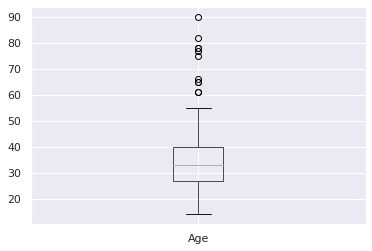

In [10]:
pd.DataFrame(df['Age']).boxplot()

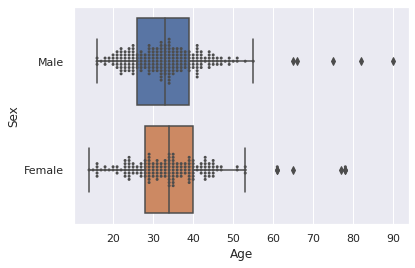

In [21]:
ax = sns.boxplot(x=df['Age'], y=df['Sex'])
ax = sns.swarmplot(x=df['Age'], y=df['Sex'],size=3, color=".3", linewidth=0)

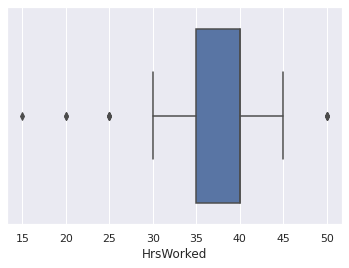

In [12]:
ax = sns.boxplot(x=df['HrsWorked'])

In [93]:
df.groupby(df.Sex.astype('category').cat.codes).count()


,ID,Age,ConCan,Demo,Employed,HrsWorked,InCanReason,InCanTime,InVehReason,InVehTime,LookEmp,MonIncome,PayPerNight,People,Resident,Sex,SocService,VehRun,Wage,WelCan
0,174,174,174,174,174,56,174,174,174,174,61,56,174,174,174,174,174,174,56,174
1,226,226,226,226,226,65,226,226,226,226,75,65,226,226,226,226,226,226,65,226


In [132]:

df.groupby('SocService').count()[['ID']]

,ID
SocService,
No,376
Yes,24


In [135]:
df.groupby('People').count()[['ID']]

,ID
People,
0,260
1,113
2,27


In [99]:
df.groupby('Sex').count()[['ID']]

,ID
Sex,
Female,174
Male,226


In [87]:
df.groupby('Demo').count()[['MonIncome']]

,MonIncome
Demo,
Employee,110
Higher Needs,11
Visitor,0


In [128]:
df.groupby('Demo').count()[['PayPerNight']]

,PayPerNight
Demo,
Employee,113
Higher Needs,23
Visitor,264


In [74]:
df.groupby('Demo').count()[['ID']]

,ID
Demo,
Employee,113
Higher Needs,23
Visitor,264


In [129]:
emp_income = df[['Demo','MonIncome', 'PayPerNight']][df.Demo == 'Employee'].fillna(df[['Demo', 'MonIncome']][df.Demo == 'Employee'].mean())
emp_income

,Demo,MonIncome,PayPerNight
6,Employee,2870.0,14.0
13,Employee,3360.0,12.0
16,Employee,2415.0,6.0
17,Employee,2940.0,16.0
20,Employee,3240.0,10.0
...,...,...,...
382,Employee,3690.0,19.0
384,Employee,2920.0,7.0
388,Employee,2905.0,10.5
397,Employee,3680.0,20.0


In [117]:
df[['MonIncome']][df.Demo == 'Higher Needs']

,MonIncome
0,1800.0
9,NaN
30,NaN
36,NaN
49,900.0
52,NaN
63,NaN
101,2275.0
102,1830.0
110,1800.0


In [124]:
data = df[['MonIncome']][df.Demo == 'Higher Needs'].fillna(df[['Demo', 'MonIncome']][df.Demo == 'Higher Needs'].mean())

In [125]:
data

,MonIncome
0,1800.000000
9,1920.454545
30,1920.454545
36,1920.454545
49,900.000000
52,1920.454545
63,1920.454545
101,2275.000000
102,1830.000000
110,1800.000000


In [103]:
df[['Demo', 'MonIncome']][df.Demo == 'Employee']

,Demo,MonIncome
6,Employee,2870.0
13,Employee,3360.0
16,Employee,2415.0
17,Employee,2940.0
20,Employee,3240.0
...,...,...
382,Employee,3690.0
384,Employee,2920.0
388,Employee,2905.0
397,Employee,3680.0


In [100]:
df.groupby('InCanReason').count()[['ID']]

,ID
InCanReason,
Biking,68
Climbing,63
Hiking,41
Other,33
Passing,6
Snow,58
Touring,75
Working,56


In [101]:
df.groupby('Demo').count()[['ID']]

,ID
Demo,
Employee,113
Higher Needs,23
Visitor,264


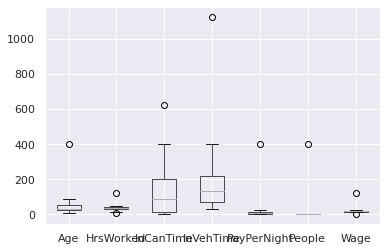

In [13]:
df.describe().drop(['MonIncome', 'ID'], axis=1).boxplot()

In [17]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,ConCan,Demo,Employed,InCanReason,InVehReason,LookEmp,Resident,Sex,SocService,VehRun,WelCan
0,Yes,Higher Needs,Yes,Biking,Not Find,No,CC,Male,Yes,Yes,Yes
1,Yes,Visitor,No,Hiking,Travelling,NaN,CC,Male,No,Yes,Yes
2,Yes,Visitor,No,Climbing,Travelling,NaN,CC,Male,No,Yes,Yes
3,Yes,Visitor,No,Snow,Minimal,NaN,CC,Male,No,Yes,Yes
4,Yes,Visitor,No,Biking,Travelling,NaN,CC,Male,No,Yes,Yes


In [18]:
obj_df[obj_df.isnull().any(axis=1)]

,ConCan,Demo,Employed,InCanReason,InVehReason,LookEmp,Resident,Sex,SocService,VehRun,WelCan
1,Yes,Visitor,No,Hiking,Travelling,NaN,CC,Male,No,Yes,Yes
2,Yes,Visitor,No,Climbing,Travelling,NaN,CC,Male,No,Yes,Yes
3,Yes,Visitor,No,Snow,Minimal,NaN,CC,Male,No,Yes,Yes
4,Yes,Visitor,No,Biking,Travelling,NaN,CC,Male,No,Yes,Yes
5,Yes,Visitor,No,Touring,Travelling,NaN,CC,Female,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
392,Yes,Visitor,No,Climbing,Travelling,NaN,WP,Male,No,Yes,Yes
393,No,Visitor,No,Biking,Saving,NaN,WP,Male,No,Yes,Yes
394,No,Visitor,No,Biking,Minimal,NaN,VV,Female,No,Yes,Yes
395,Yes,Visitor,No,Snow,#vanlife,NaN,CC,Male,No,Yes,Yes


In [19]:
obj_df["LookEmp"].value_counts()

No     133
Yes      3
Name: LookEmp, dtype: int64

In [20]:
obj_df = obj_df.fillna({"LookEmp": "No"})

In [21]:
obj_df["InCanReason"] = obj_df["InCanReason"].astype('category')
obj_df.dtypes

ConCan           object
Demo             object
Employed         object
InCanReason    category
InVehReason      object
LookEmp          object
Resident         object
Sex              object
SocService       object
VehRun           object
WelCan           object
dtype: object

In [22]:
obj_df["InCanReason_cat"] = obj_df["InCanReason"].cat.codes
obj_df.head()

,ConCan,Demo,Employed,InCanReason,InVehReason,LookEmp,Resident,Sex,SocService,VehRun,WelCan,InCanReason_cat
0,Yes,Higher Needs,Yes,Biking,Not Find,No,CC,Male,Yes,Yes,Yes,0
1,Yes,Visitor,No,Hiking,Travelling,No,CC,Male,No,Yes,Yes,2
2,Yes,Visitor,No,Climbing,Travelling,No,CC,Male,No,Yes,Yes,1
3,Yes,Visitor,No,Snow,Minimal,No,CC,Male,No,Yes,Yes,5
4,Yes,Visitor,No,Biking,Travelling,No,CC,Male,No,Yes,Yes,0


In [24]:
obj_df["Sex"] = obj_df["Sex"].astype('category')

obj_df["Sex_cat"] = obj_df["Sex"].cat.codes
obj_df.head()

,ConCan,Demo,Employed,InCanReason,InVehReason,LookEmp,Resident,Sex,SocService,VehRun,WelCan,InCanReason_cat,Sex_cat
0,Yes,Higher Needs,Yes,Biking,Not Find,No,CC,Male,Yes,Yes,Yes,0,1
1,Yes,Visitor,No,Hiking,Travelling,No,CC,Male,No,Yes,Yes,2,1
2,Yes,Visitor,No,Climbing,Travelling,No,CC,Male,No,Yes,Yes,1,1
3,Yes,Visitor,No,Snow,Minimal,No,CC,Male,No,Yes,Yes,5,1
4,Yes,Visitor,No,Biking,Travelling,No,CC,Male,No,Yes,Yes,0,1


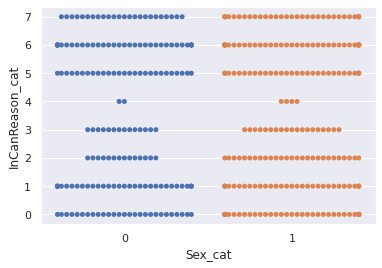

In [35]:
sns.swarmplot(y="InCanReason_cat", x="Sex_cat",
              data=obj_df)

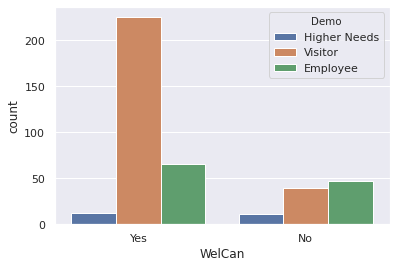

In [42]:
sns.countplot(x='WelCan', hue='Demo', data=df)

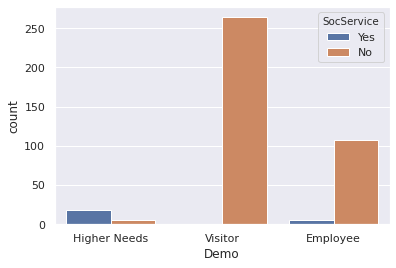

In [138]:
sns.countplot(x='Demo', hue='SocService', data=df)

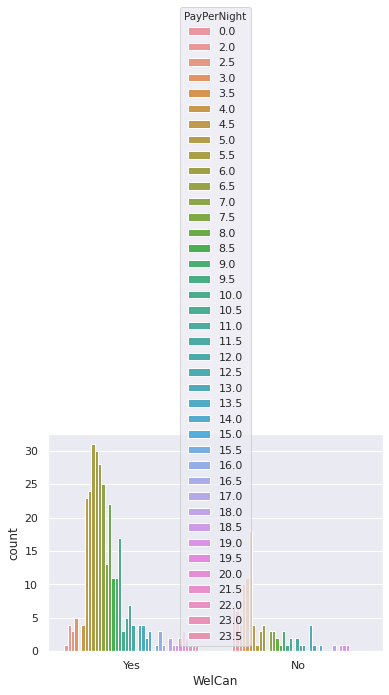

In [52]:
sns.countplot(x='WelCan', hue='PayPerNight', data=df)

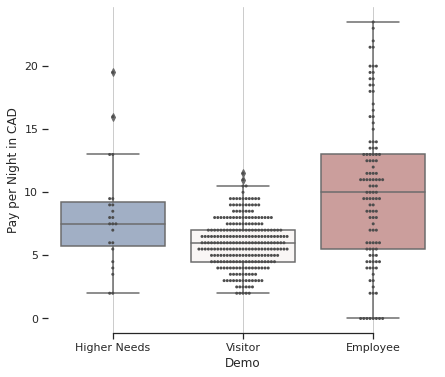

In [70]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="Demo", y="PayPerNight", data=df,
             palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="Demo", y="PayPerNight", data=df,
              size=3, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Pay per Night in CAD")
sns.despine(trim=True, left=True)

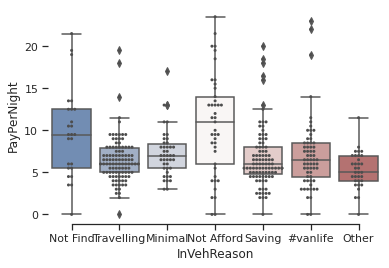

In [71]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="InVehReason", y="PayPerNight", data=df,
             palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="InVehReason", y="PayPerNight", data=df,
              size=3, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Pay per Night in CAD")
sns.despine(trim=True, left=True)

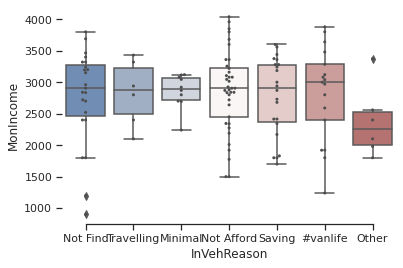

In [77]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="InVehReason", y="MonIncome", data=df,
             palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="InVehReason", y="MonIncome", data=df,
              size=3, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Pay per Night in CAD")
sns.despine(trim=True, left=True)

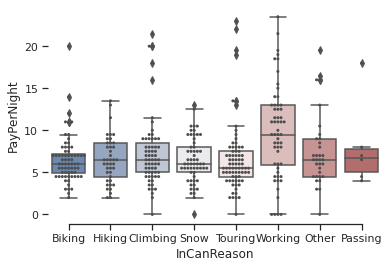

In [72]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="InCanReason", y="PayPerNight", data=df,
             palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="InCanReason", y="PayPerNight", data=df,
              size=3, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Pay per Night in CAD")
sns.despine(trim=True, left=True)

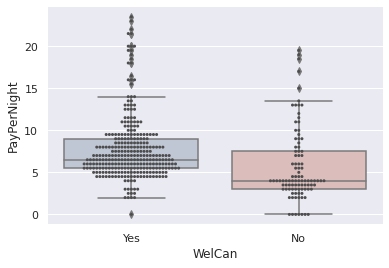

In [7]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="WelCan", y="PayPerNight", data=df,
             palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="WelCan", y="PayPerNight", data=df,
              size=3, color=".3", linewidth=0)

# Tweak the visual presentation
#sns.xaxis.grid(True)
#sns.set(ylabel="Pay per Night in CAD")
sns.despine(trim=True, left=True)

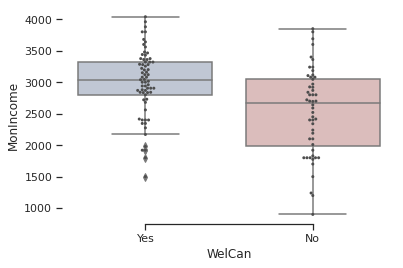

In [68]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="WelCan", y="MonIncome", data=df,
             palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="WelCan", y="MonIncome", data=df,
              size=3, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Pay per Night in CAD")
sns.despine(trim=True, left=True)

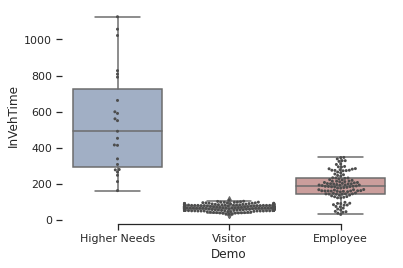

In [76]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Demo", y="InVehTime", data=df,
             palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="Demo", y="InVehTime", data=df,
              size=3, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Pay per Night in CAD")
sns.despine(trim=True, left=True)

In [ ]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Demo", y="InVehTime", data=df,
             palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="Demo", y="InVehTime", data=df,
              size=3, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Pay per Night in CAD")
sns.despine(trim=True, left=True)

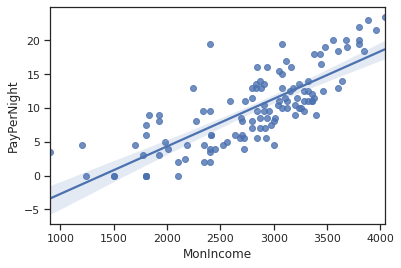

In [63]:

ax = sns.regplot(x="MonIncome", y="PayPerNight", data=df)

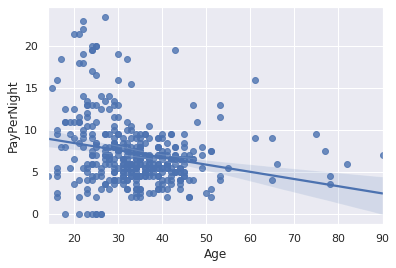

In [131]:
ax = sns.regplot(x="Age", y="PayPerNight", data=df)

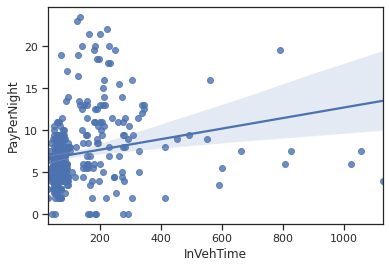

In [73]:

ax = sns.regplot(x="InVehTime", y="PayPerNight", data=df)

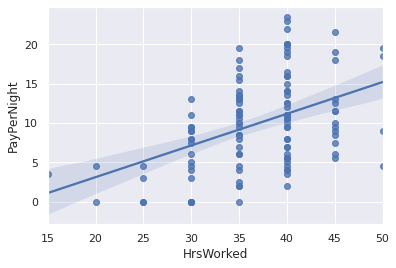

In [13]:

ax = sns.regplot(x="HrsWorked", y="PayPerNight", data=df)

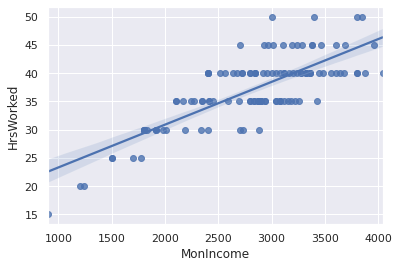

In [14]:
ax = sns.regplot(x="MonIncome", y="HrsWorked", data=df)

In [ ]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Demo", y="PayPerNight", data=df,
             palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="Demo", y="PayPerNight", data=df,
              size=3, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Pay per Night in CAD")
sns.despine(trim=True, left=True)

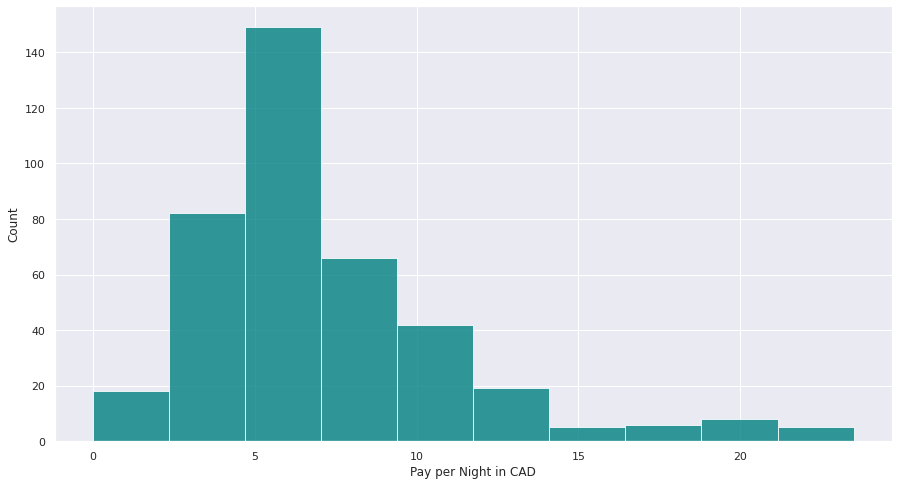

In [53]:
plt.figure(figsize=(15,8))
ax = df.PayPerNight.hist(bins=10, color='teal', alpha=0.8)
ax.set(xlabel='Pay per Night in CAD', ylabel='Count')
plt.show()

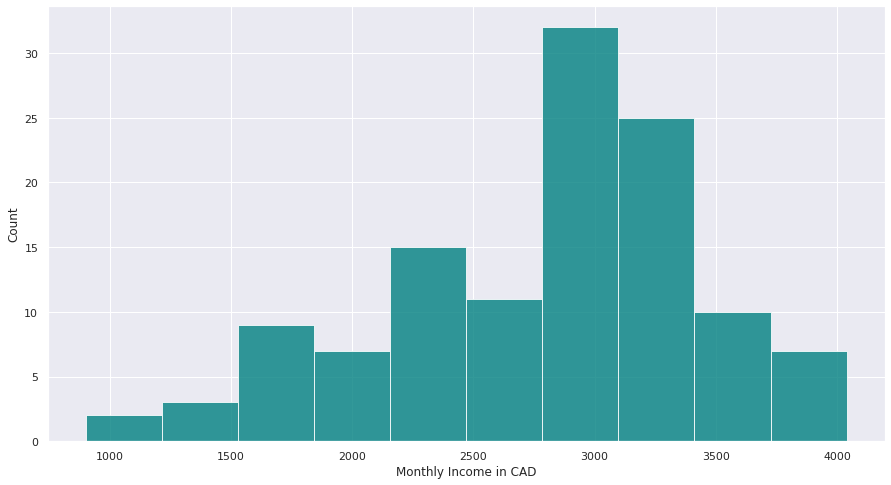

In [8]:
plt.figure(figsize=(15,8))
ax = df.MonIncome.hist(bins=10, color='teal', alpha=0.8)
ax.set(xlabel='Monthly Income in CAD', ylabel='Count')
plt.show()

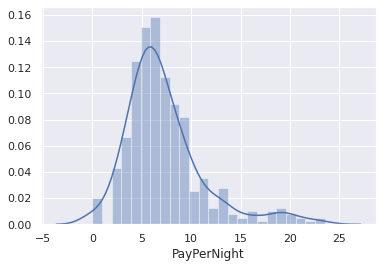

In [54]:
ax = sns.distplot(df.PayPerNight)

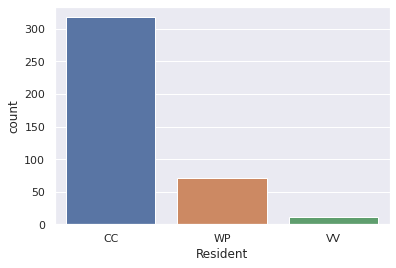

In [37]:
sns.countplot(x='Resident', data=df)

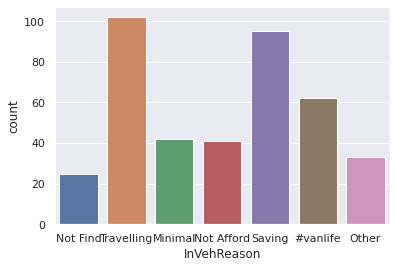

In [36]:
sns.countplot(x='InVehReason', data=df)

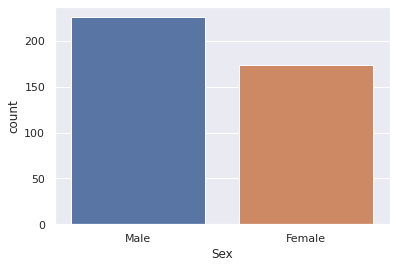

In [29]:
sns.countplot(x='Sex', data=df)

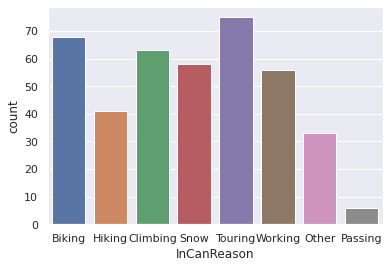

In [30]:
sns.countplot(x='InCanReason', data=df)

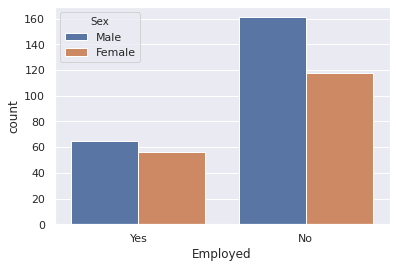

In [34]:
sns.countplot(x='Employed', hue='Sex', data=df)

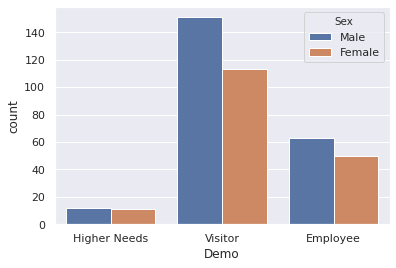

In [33]:
sns.countplot(x='Demo',hue='Sex', data=df)